In [113]:
import geopandas

In [114]:
gdf = geopandas.read_parquet('repub_lean.parquet')

<AxesSubplot:>

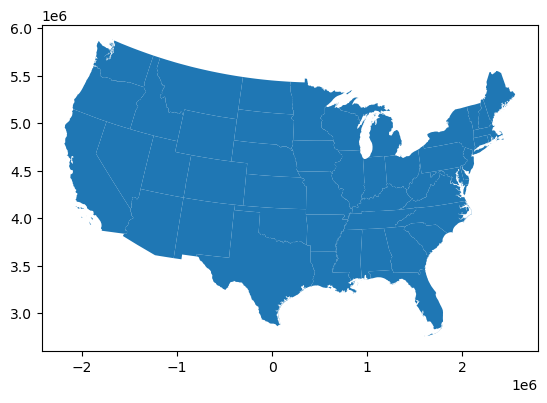

In [115]:
gdf.plot()

<AxesSubplot:>

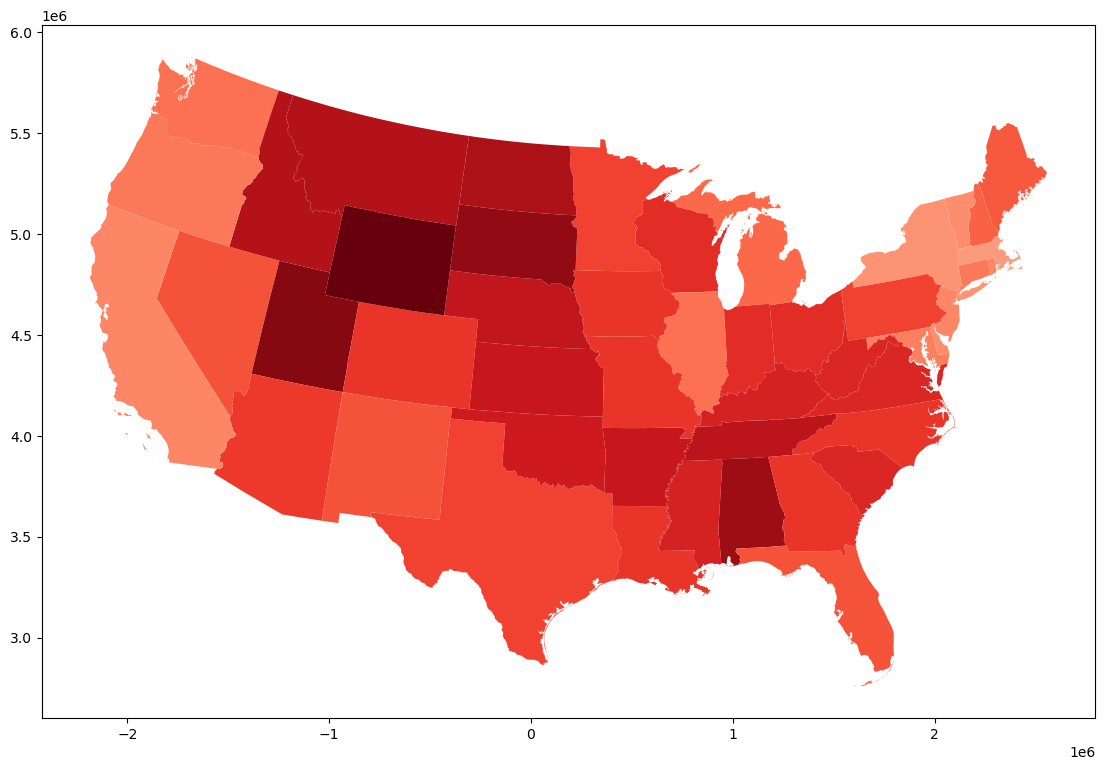

In [116]:
gdf.plot(column='rep_int', cmap='Reds', figsize=(16,9))

In [117]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Spatial Lag Leaning Republican')

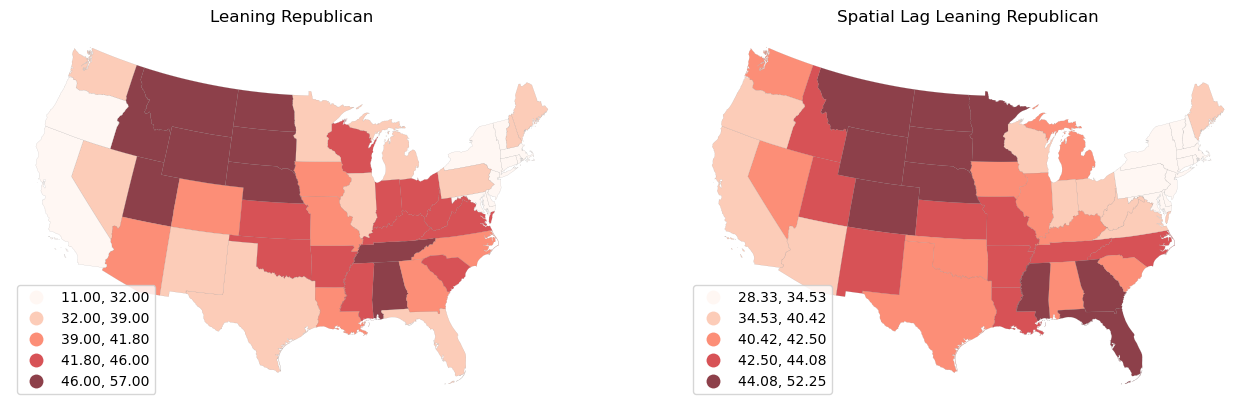

In [118]:
f, axs = plt.subplots(1, 2, figsize=(16, 9))
ax1, ax2 = axs



gdf.plot(column='rep_int',
         cmap='Reds',
         scheme='quantiles',
         k=5,
         edgecolor='grey',
         linewidth=0.1,
         alpha=0.75,
         legend=True,
         legend_kwds={'loc': 'lower left'},
         ax =ax1,
        )
ax1.set_axis_off()
ax1.set_title("Leaning Republican")


gdf.plot(column='lag_rep_int',
         cmap='Reds',
         scheme='quantiles',
         k=5,
         edgecolor='grey',
         linewidth=0.1,
         alpha=0.75,
         legend=True,
         legend_kwds={'loc': 'lower left'},
         ax =ax2,
        )
ax2.set_axis_off()
ax2.set_title("Spatial Lag Leaning Republican")

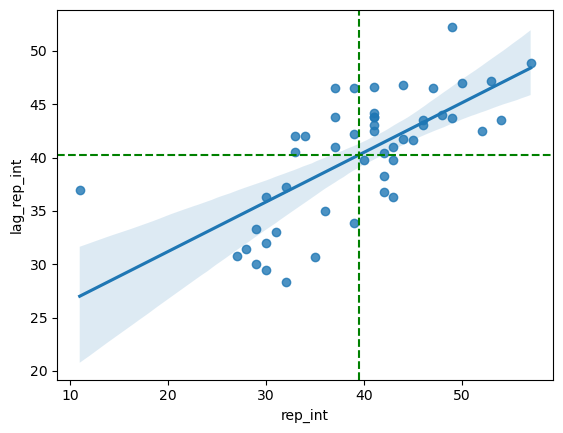

In [119]:
import seaborn as sns
_ = sns.regplot(x='rep_int', y='lag_rep_int', data=gdf)
plt.axhline(y=gdf.lag_rep_int.mean(), color='g', linestyle='--')
plt.axvline(x=gdf.rep_int.mean(), color='g', linestyle='--')

In [120]:
gdf.head()

,index,GEO_ID,STATE,state,LSAD,CENSUSAREA,geometry,Rep,No lean,Democrat/lean Dem.,Sample\tsize,rep_int,queen_neighbors,lag_rep_int
0,0,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((2516172.424 5253443.650, 25164...",36%,17%,47%,303,36,1,35.00
1,1,0400000US25,25,Massachusetts,,7800.058,"MULTIPOLYGON (((2351724.597 4850457.653, 23526...",27%,17%,56%,704,27,5,30.80
2,2,0400000US26,26,Michigan,,56538.901,"MULTIPOLYGON (((821167.988 5338182.388, 821794...",34%,19%,47%,982,34,3,42.00
3,3,0400000US30,30,Montana,,145545.801,"POLYGON ((-371533.418 5042503.702, -386687.255...",49%,21%,30%,312,49,4,52.25
4,4,0400000US32,32,Nevada,,109781.180,"POLYGON ((-1384104.733 4308747.816, -1385163.9...",37%,18%,46%,314,37,5,41.00


In [121]:
y = gdf.rep_int
ylag = gdf.lag_rep_int

yh = y > y.mean()
ylh = ylag > ylag.mean()

In [122]:
q = 1 * yh * ylh + (2 * (1-yh) * ylh) + (3 * (1-yh) * (1-ylh))
q[q==0] = 4

In [123]:
gdf['q'] = q

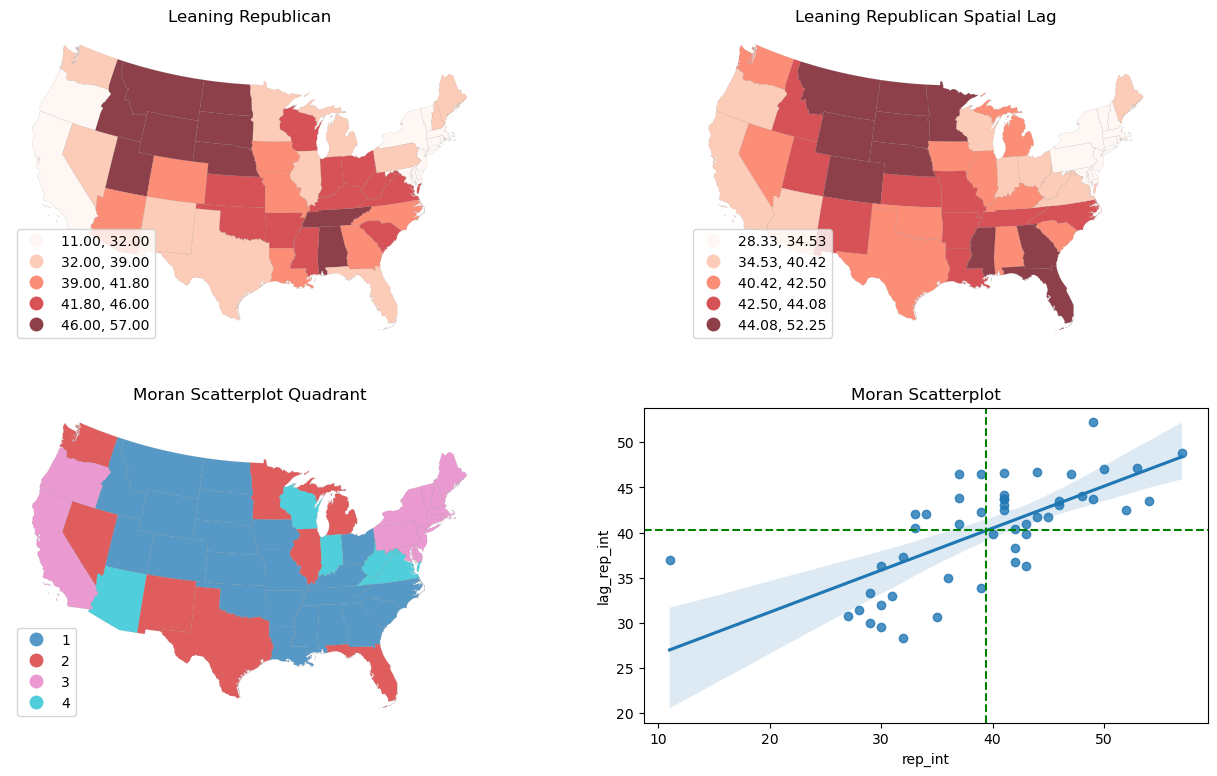

In [124]:
f, axs = plt.subplots(2,2, figsize=(16, 9))
ax1 = axs[0,0]
ax2 = axs[0,1]
ax3 = axs[1,0]
ax4 = axs[1,1]


gdf.plot(column='rep_int',
         cmap='Reds',
         scheme='quantiles',
         k=5,
         edgecolor='grey',
         linewidth=0.1,
         alpha=0.75,
         legend=True,
         legend_kwds={'loc': 'lower left'},
         ax =ax1,
        )
ax1.set_axis_off()
ax1.set_title("Leaning Republican")


gdf.plot(column='lag_rep_int',
         cmap='Reds',
         scheme='quantiles',
         k=5,
         edgecolor='grey',
         linewidth=0.1,
         alpha=0.75,
         legend=True,
         legend_kwds={'loc': 'lower left'},
         ax =ax2,
        )
ax2.set_axis_off()
ax2.set_title("Leaning Republican Spatial Lag")


gdf.plot(column='q',
         categorical=True,
         edgecolor='grey',
         linewidth=0.1,
         alpha=0.75,
         legend=True,
         legend_kwds={'loc': 'lower left'},
         ax =ax3,
        )
ax3.set_axis_off()
_= ax3.set_title("Moran Scatterplot Quadrant")


_ = sns.regplot(x='rep_int', y='lag_rep_int', data=gdf, ax=ax4)
plt.axhline(y=gdf.lag_rep_int.mean(), color='g', linestyle='--')
plt.axvline(x=gdf.rep_int.mean(), color='g', linestyle='--')
_= ax4.set_title("Moran Scatterplot")



## Moran's I

$$
I = \frac{n}{\sum_i \sum_j w_{i,j}} \frac{\sum_i \sum_j w_{i,j} z_i z_j} {\sum_i z_i^2}
$$
where $n$ is the number of observations, $z_i = y_i - \bar{y}$, and $w_{i,j}$ is the cell corresponding to the $i$-th row and $j$-th column of the spatial weights matrix.

In [125]:
from esda.moran import Moran
import libpysal

In [126]:
y = gdf.rep_int
w = libpysal.weights.Queen.from_dataframe(gdf)

In [127]:
 
mi = Moran(y, w)

In [128]:
mi.EI

-0.020833333333333332

In [129]:
mi.EI_sim

-0.018233960161648737

In [130]:
mi.p_sim

0.001

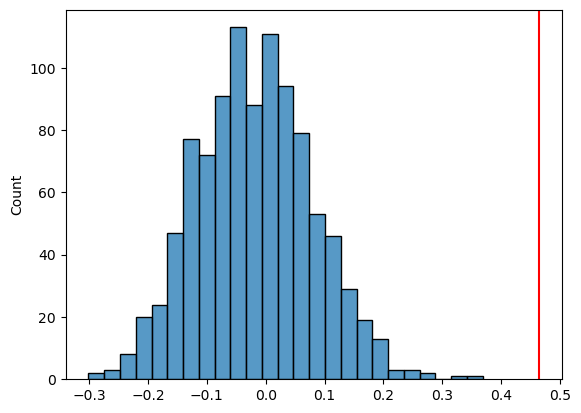

In [131]:
import seaborn
ax = seaborn.histplot(mi.sim)
_ = plt.axvline(mi.I, 0, 100, color='r')

## A closer look at permutation based inference

In [132]:
import numpy

In [133]:
gdf.shape

(49, 15)

In [134]:
ids = numpy.arange(49)

In [135]:
ids

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [136]:
numpy.random.seed(12345) # for reproducibility
rids = numpy.random.permutation(ids)

In [137]:
rids

array([44, 21, 12, 40, 35,  8, 20, 33, 32,  2, 31, 38, 22, 30, 42, 26, 19,
        5,  3, 15,  0,  4, 39, 25, 24, 23, 28, 43,  7,  6, 18, 17, 10, 13,
       11,  9, 16, 27, 14, 45, 46, 48, 47, 41, 36,  1, 29, 37, 34])

In [138]:
y = gdf.rep_int.values

In [139]:
y

array([36, 27, 34, 49, 37, 30, 28, 41, 42, 39, 30, 48, 39, 54, 33, 42, 31,
       52, 40, 46, 30, 41, 32, 29, 11, 37, 41, 49, 33, 42, 41, 46, 44, 41,
       39, 44, 41, 47, 35, 37, 50, 45, 32, 43, 53, 29, 43, 43, 57])

In [140]:
y[rids]

array([53, 41, 39, 50, 44, 42, 30, 41, 44, 34, 46, 35, 32, 41, 32, 41, 46,
       30, 49, 42, 36, 37, 37, 37, 11, 29, 33, 43, 41, 28, 40, 52, 30, 54,
       48, 39, 31, 49, 33, 29, 43, 57, 43, 45, 41, 27, 42, 47, 39])

In [141]:
yr = y[rids]

In [142]:
from libpysal.weights import lag_spatial

In [143]:
w.transform='r'

In [144]:
lag_yr = lag_spatial(w, yr)

In [145]:
gdf['lag_yr'] = lag_yr
gdf['yr' ]= yr

In [146]:
yh = yr > y.mean()
ylh = lag_yr > lag_yr.mean()
q = 1 * yh * ylh + (2 * (1-yh) * ylh) + (3 * (1-yh) * (1-ylh))
q[q==0] = 4
gdf['qr'] = q

In [147]:
gdf.qr

0     4
1     4
2     3
3     1
4     1
5     4
6     3
7     4
8     4
9     2
10    4
11    3
12    2
13    1
14    2
15    1
16    4
17    3
18    4
19    1
20    2
21    2
22    3
23    2
24    2
25    3
26    3
27    1
28    4
29    3
30    1
31    1
32    3
33    4
34    1
35    2
36    2
37    1
38    2
39    2
40    1
41    4
42    4
43    4
44    1
45    3
46    4
47    4
48    2
Name: qr, dtype: int64

In [148]:
 
mir = Moran(yr, w)

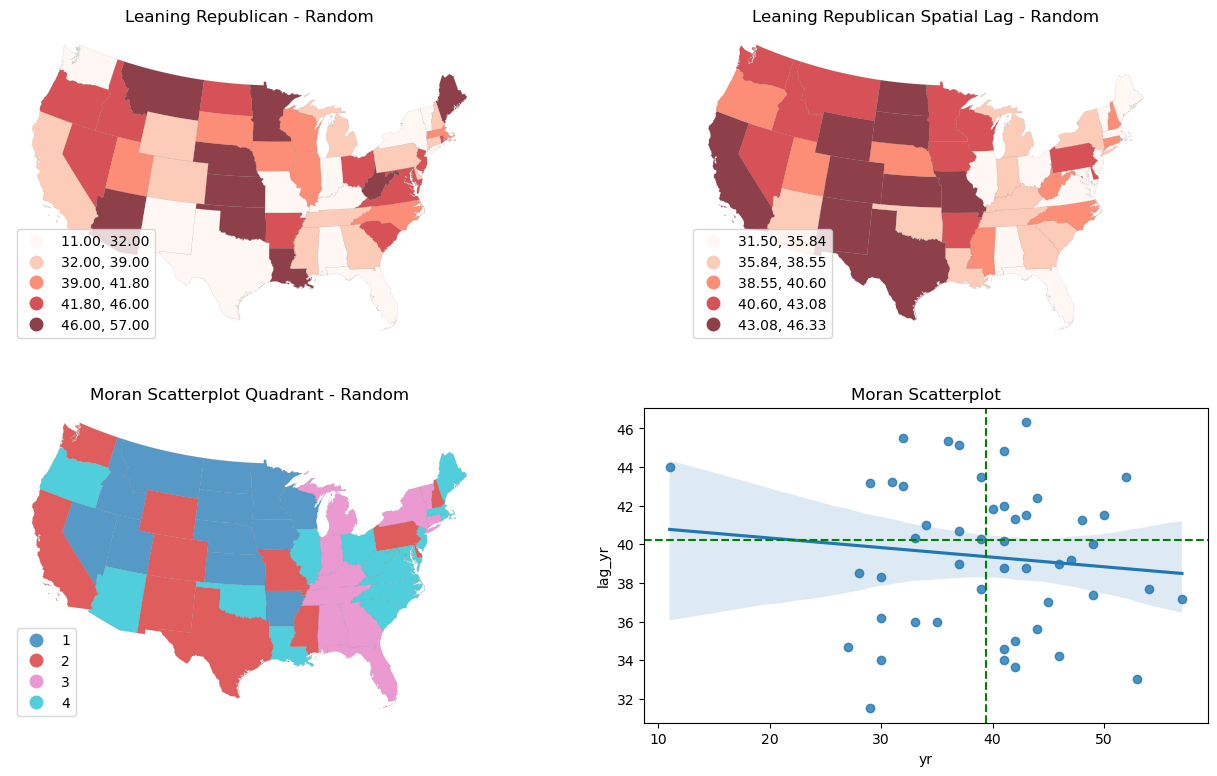

In [149]:
f, axs = plt.subplots(2,2, figsize=(16, 9))

ax1 = axs[0,0]
ax2 = axs[0,1]
ax3 = axs[1,0]
ax4 = axs[1,1]


gdf.plot(column='yr',
         cmap='Reds',
         scheme='quantiles',
         k=5,
         edgecolor='grey',
         linewidth=0.1,
         alpha=0.75,
         legend=True,
         legend_kwds={'loc': 'lower left'},
         ax =ax1,
        )
ax1.set_axis_off()
ax1.set_title("Leaning Republican - Random")


gdf.plot(column='lag_yr',
         cmap='Reds',
         scheme='quantiles',
         k=5,
         edgecolor='grey',
         linewidth=0.1,
         alpha=0.75,
         legend=True,
         legend_kwds={'loc': 'lower left'},
         ax =ax2,
        )
ax2.set_axis_off()
ax2.set_title("Leaning Republican Spatial Lag - Random")


gdf.plot(column='qr',
         categorical=True,
         edgecolor='grey',
         linewidth=0.1,
         alpha=0.75,
         legend=True,
         legend_kwds={'loc': 'lower left'},
         ax =ax3,
        )
ax3.set_axis_off()
_= ax3.set_title("Moran Scatterplot Quadrant - Random")


_ = sns.regplot(x='yr', y='lag_yr', data=gdf, ax=ax4)
plt.axhline(y=gdf.lag_rep_int.mean(), color='g', linestyle='--')
plt.axvline(x=gdf.rep_int.mean(), color='g', linestyle='--')
_= ax4.set_title("Moran Scatterplot")


In [150]:
mir.p_sim

0.385

In [151]:
mi.I, mir.I

(0.4648896481706091, -0.049619432153642166)

## How many random permutations (maps) can we conceivably make?

$$n!$$

In [152]:
gdf.shape

(49, 18)

In [153]:
import math

In [154]:
math.factorial(49)

608281864034267560872252163321295376887552831379210240000000000

In [155]:
f'{float(math.factorial(49)):.2}'

'6.1e+62'

In [156]:
1000 / 100


10.0

In [157]:
6.1e+62 / 1e+60

610.0

In [158]:
f'There are {6.1e+62 / 1e+60} Novemdecillion possible random maps we could generate.'

'There are 610.0 Novemdecillion possible random maps we could generate.'

## Fastest computer today
[2 quintrillion calculations per second](https://msutoday.msu.edu/news/2023/msu-takes-fastest-supercomputer-to-final-frontier#:~:text=Frontier%20is%20capable%20of%20performing,Frontier%20to%20better%20understand%20galaxies.)

A quintrillion is $10^{18}$



In [159]:
seconds = 6.1e+62/1e+18

print(f'Using the fastest computer we have today, we would need {seconds} seconds to generate all such maps')

Using the fastest computer we have today, we would need 6.1e+44 seconds to generate all such maps


In [160]:
13.7e+9 #  years since the big bang

13700000000.0

In [161]:
histories = seconds / (13.7e+9 * 60 * 60 * 24 * 365)

In [162]:
print(f'We would need to string together {histories} periods of length since the Big Bang in order to do this!')

We would need to string together 1.411895847452292e+27 periods of length since the Big Bang in order to do this!
